## Day 24 Lecture 2 Assignment

In this assignment, we will build our a more complex logistic regression model, this time on both numeric and categorical data. We will use the Chicago traffic crashes dataset loaded below and analyze the model generated for this dataset.

In [1]:
%matplotlib inline

import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

import ds_useful

In [2]:
crash_data = pd.read_csv('https://tf-assets-prod.s3.amazonaws.com/tf-curric/data-science/traffic_crashes_chicago.csv')

In [3]:
crash_data.head()

,RD_NO,CRASH_DATE,POSTED_SPEED_LIMIT,TRAFFIC_CONTROL_DEVICE,DEVICE_CONDITION,WEATHER_CONDITION,LIGHTING_CONDITION,FIRST_CRASH_TYPE,TRAFFICWAY_TYPE,LANE_CNT,...,WORKERS_PRESENT_I,NUM_UNITS,MOST_SEVERE_INJURY,INJURIES_TOTAL,INJURIES_FATAL,INJURIES_INCAPACITATING,INJURIES_NON_INCAPACITATING,INJURIES_REPORTED_NOT_EVIDENT,INJURIES_NO_INDICATION,INJURIES_UNKNOWN
0,JC334993,7/4/2019 22:33,45,NO CONTROLS,NO CONTROLS,CLEAR,"DARKNESS, LIGHTED ROAD",REAR END,DIVIDED - W/MEDIAN BARRIER,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,JC370822,7/30/2019 10:22,30,NO CONTROLS,NO CONTROLS,CLEAR,DAYLIGHT,TURNING,DIVIDED - W/MEDIAN (NOT RAISED),NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,JC387098,8/10/2019 17:00,25,NO CONTROLS,NO CONTROLS,CLEAR,DAYLIGHT,PARKED MOTOR VEHICLE,ONE-WAY,NaN,...,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,JC395195,8/16/2019 16:53,30,NO CONTROLS,NO CONTROLS,CLEAR,DAYLIGHT,PARKED MOTOR VEHICLE,NOT DIVIDED,NaN,...,NaN,1.0,NO INDICATION OF INJURY,0.0,0.0,0.0,0.0,0.0,1.0,0.0
4,JC396604,8/17/2019 16:04,30,NO CONTROLS,NO CONTROLS,CLEAR,DAYLIGHT,PARKED MOTOR VEHICLE,PARKING LOT,NaN,...,NaN,1.0,NO INDICATION OF INJURY,0.0,0.0,0.0,0.0,0.0,1.0,0.0


First, create a binary response column by modifying the "DAMAGE" column. Consider "OVER \$1500" to be the positive class, and under \$1500 to be the negative class.

In [4]:
# create a binary response column by modifying the "DAMAGE" column. Consider "OVER \$1500" to be the positive class, and under \$1500 to be the negative class.

#Rename the columns for easy reference
crash_data.rename(columns=lambda x: x.lower(), inplace=True)

# See what the values are
print(crash_data.damage.unique())

['OVER $1,500' '$501 - $1,500' '$500 OR LESS']


In [5]:
# Replace the column with a binary indicator for over 15000
crash_data.damage = np.where(crash_data.damage == 'OVER $1,500', 1, 0)
crash_data

,rd_no,crash_date,posted_speed_limit,traffic_control_device,device_condition,weather_condition,lighting_condition,first_crash_type,trafficway_type,lane_cnt,...,workers_present_i,num_units,most_severe_injury,injuries_total,injuries_fatal,injuries_incapacitating,injuries_non_incapacitating,injuries_reported_not_evident,injuries_no_indication,injuries_unknown
0,JC334993,7/4/2019 22:33,45,NO CONTROLS,NO CONTROLS,CLEAR,"DARKNESS, LIGHTED ROAD",REAR END,DIVIDED - W/MEDIAN BARRIER,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,JC370822,7/30/2019 10:22,30,NO CONTROLS,NO CONTROLS,CLEAR,DAYLIGHT,TURNING,DIVIDED - W/MEDIAN (NOT RAISED),NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,JC387098,8/10/2019 17:00,25,NO CONTROLS,NO CONTROLS,CLEAR,DAYLIGHT,PARKED MOTOR VEHICLE,ONE-WAY,NaN,...,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,JC395195,8/16/2019 16:53,30,NO CONTROLS,NO CONTROLS,CLEAR,DAYLIGHT,PARKED MOTOR VEHICLE,NOT DIVIDED,NaN,...,NaN,1.0,NO INDICATION OF INJURY,0.0,0.0,0.0,0.0,0.0,1.0,0.0
4,JC396604,8/17/2019 16:04,30,NO CONTROLS,NO CONTROLS,CLEAR,DAYLIGHT,PARKED MOTOR VEHICLE,PARKING LOT,NaN,...,NaN,1.0,NO INDICATION OF INJURY,0.0,0.0,0.0,0.0,0.0,1.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
372580,JC378354,8/4/2019 15:00,30,NO CONTROLS,NO CONTROLS,CLEAR,DAYLIGHT,TURNING,NOT DIVIDED,NaN,...,NaN,2.0,NONINCAPACITATING INJURY,1.0,0.0,0.0,1.0,0.0,1.0,0.0
372581,JC406679,8/25/2019 13:07,30,TRAFFIC SIGNAL,FUNCTIONING PROPERLY,CLEAR,DAYLIGHT,REAR END,FOUR WAY,NaN,...,NaN,2.0,NO INDICATION OF INJURY,0.0,0.0,0.0,0.0,0.0,3.0,0.0
372582,JC406342,8/25/2019 6:00,35,NO CONTROLS,NO CONTROLS,CLEAR,DAYLIGHT,REAR END,NOT DIVIDED,NaN,...,NaN,2.0,NONINCAPACITATING INJURY,1.0,0.0,0.0,1.0,0.0,0.0,0.0
372583,JC386106,8/9/2019 21:24,30,TRAFFIC SIGNAL,FUNCTIONING PROPERLY,CLEAR,"DARKNESS, LIGHTED ROAD",REAR END,NOT DIVIDED,NaN,...,NaN,2.0,NO INDICATION OF INJURY,0.0,0.0,0.0,0.0,0.0,3.0,0.0


Using the code from Day 21, Lecture 1 as a starting point, devise an appropriate way to address missing values. You have a lot of freedom here; we will proceed by taking the following steps:

- Dropping all columns with more than 5% missing data
- Imputing the median for numeric columns with less than 5% missing data (except for STREET_NO; imputing it in this manner would not make any sense)
- Dropping rows with missing data for categorical columns that have less than 5% missing data

In [6]:
# answer goes here

# Get missing data
missing = ds_useful.missingness_summary(crash_data, print_log=True)

# Drop the indexes of missing whose values are greater than 5
crash_data.drop(columns=missing.loc[missing > 5].index, axis=1, inplace=True)
ds_useful.missingness_summary(crash_data)

workers_present_i                99.835205
dooring_i                        99.661554
work_zone_type                   99.439054
work_zone_i                      99.293316
photos_taken_i                   98.731833
statements_taken_i               97.976032
not_right_of_way_i               95.391656
intersection_related_i           77.945704
hit_and_run_i                    72.242307
lane_cnt                         46.710683
report_type                       2.301220
most_severe_injury                0.579465
injuries_no_indication            0.577586
injuries_total                    0.577586
injuries_fatal                    0.577586
injuries_incapacitating           0.577586
injuries_non_incapacitating       0.577586
injuries_reported_not_evident     0.577586
injuries_unknown                  0.577586
num_units                         0.375485
beat_of_occurrence                0.001074
street_direction                  0.000537
street_name                       0.000268
traffic_con

report_type                      2.301220
most_severe_injury               0.579465
injuries_unknown                 0.577586
injuries_no_indication           0.577586
injuries_reported_not_evident    0.577586
injuries_non_incapacitating      0.577586
injuries_incapacitating          0.577586
injuries_fatal                   0.577586
injuries_total                   0.577586
num_units                        0.375485
beat_of_occurrence               0.001074
street_direction                 0.000537
street_name                      0.000268
posted_speed_limit               0.000000
traffic_control_device           0.000000
crash_date                       0.000000
device_condition                 0.000000
weather_condition                0.000000
trafficway_type                  0.000000
lighting_condition               0.000000
first_crash_type                 0.000000
date_police_notified             0.000000
alignment                        0.000000
roadway_surface_cond             0

In [8]:
# Now all of our columns have < 5 % missing data. 
# Let's see if street_no has any nulls
crash_data['street_no'].isnull().value_counts()

False    372585
Name: street_no, dtype: int64

In [7]:
# Don't have to worry about street data because it has no nulls

# Imputate all numeric (implied) data with the linear model
crash_data = crash_data.interpolate(method='linear')

In [9]:
# Drop any null categorical values
cat_cols = crash_data.select_dtypes('object').columns

for col in cat_cols:
    crash_data.drop(crash_data.loc[crash_data[col].isnull()].index, axis='rows', inplace=True)

In [10]:
# Assure that that worked
ds_useful.missingness_summary(crash_data)

injuries_unknown                 0.0
damage                           0.0
crash_date                       0.0
posted_speed_limit               0.0
traffic_control_device           0.0
device_condition                 0.0
weather_condition                0.0
lighting_condition               0.0
first_crash_type                 0.0
trafficway_type                  0.0
alignment                        0.0
roadway_surface_cond             0.0
road_defect                      0.0
report_type                      0.0
crash_type                       0.0
date_police_notified             0.0
injuries_no_indication           0.0
prim_contributory_cause          0.0
sec_contributory_cause           0.0
street_no                        0.0
street_direction                 0.0
street_name                      0.0
beat_of_occurrence               0.0
num_units                        0.0
most_severe_injury               0.0
injuries_total                   0.0
injuries_fatal                   0.0
i

Finally, choose a few numeric and categorical features (2-3 of each) to include in the model. (You can definitely include more than this, but too many features, especially categorical ones, will most likely lead to convergence issues). One hot encode the chosen categorical features, being sure to omit one of the categories (which will serve as a "reference" level) to avoid perfect multicollinearity.

Again, you have a lot of freedom here; we will proceed with the following features, dropping the most commonly occurring category for the two categorical variables ("CLEAR" for weather, "REAR END" for first crash type):
POSTED_SPEED_LIMIT, WEATHER_CONDITION, INJURIES_TOTAL, FIRST_CRASH_TYPE

In [11]:
# What I would do is create a correlation table to see how each numeric variable correlated with other features. I'd remove features that were similarly variable.abs
# Then for categorical Variables, I'd create a series of crosstabs to see how categorical variables compare with the label. 

# Since some features are pre-selected, I'll use those

# Define raw feature variables.
keep = ['posted_speed_limit', 'weather_condition', 'injuries_total', 'first_crash_type', 'damage']

keep_df = crash_data[keep]

# Identify the highest occuring variable for each. We'll drop these to help dimensionality.
print(keep_df.weather_condition.value_counts())
print(keep_df.first_crash_type.value_counts())

CLEAR                     286904
RAIN                       33669
UNKNOWN                    15639
SNOW                       12581
CLOUDY/OVERCAST            11039
OTHER                       1146
FOG/SMOKE/HAZE               677
SLEET/HAIL                   571
FREEZING RAIN/DRIZZLE        167
SEVERE CROSS WIND GATE        75
BLOWING SNOW                  15
Name: weather_condition, dtype: int64
REAR END                        90196
PARKED MOTOR VEHICLE            80370
SIDESWIPE SAME DIRECTION        59044
TURNING                         50528
ANGLE                           37687
FIXED OBJECT                    15374
PEDESTRIAN                       8384
SIDESWIPE OPPOSITE DIRECTION     5382
PEDALCYCLIST                     5381
OTHER OBJECT                     3273
HEAD ON                          3009
OTHER NONCOLLISION               1288
REAR TO FRONT                    1139
REAR TO SIDE                      734
REAR TO REAR                      278
ANIMAL                       

In [12]:
# Now We'll drop rows that occur far too often and behave like categorical outliers. We do this to strengthen the overall variability of our lower dimensional data.abs

keep_df.drop(keep_df.loc[keep_df['weather_condition'] == 'CLEAR'].index, inplace=True)
keep_df.drop(keep_df.loc[keep_df['first_crash_type'] == 'REAR END'].index, inplace=True)

print(keep_df.weather_condition.value_counts())
print(keep_df.first_crash_type.value_counts())

keep_df.head()

RAIN                      23950
UNKNOWN                   12887
SNOW                       9118
CLOUDY/OVERCAST            8352
OTHER                       880
FOG/SMOKE/HAZE              511
SLEET/HAIL                  429
FREEZING RAIN/DRIZZLE       124
SEVERE CROSS WIND GATE       65
BLOWING SNOW                  5
Name: weather_condition, dtype: int64
PARKED MOTOR VEHICLE            18746
SIDESWIPE SAME DIRECTION        10001
TURNING                          9676
ANGLE                            7829
FIXED OBJECT                     4099
PEDESTRIAN                       1972
SIDESWIPE OPPOSITE DIRECTION     1030
OTHER OBJECT                      799
PEDALCYCLIST                      721
HEAD ON                           663
OTHER NONCOLLISION                326
REAR TO FRONT                     197
REAR TO SIDE                      136
OVERTURNED                         45
REAR TO REAR                       44
ANIMAL                             36
TRAIN                             

,posted_speed_limit,weather_condition,injuries_total,first_crash_type,damage
10,30,CLOUDY/OVERCAST,1.0,SIDESWIPE SAME DIRECTION,1
18,25,RAIN,0.0,FIXED OBJECT,1
21,30,CLOUDY/OVERCAST,0.0,PARKED MOTOR VEHICLE,0
22,30,RAIN,0.0,TURNING,0
26,25,UNKNOWN,0.0,PARKED MOTOR VEHICLE,0


In [13]:
# Now let's one hot encode the categorical data.
print(keep_df.shape)
feature_df = pd.get_dummies(keep_df.select_dtypes('object'), drop_first=True)
print(feature_df.shape)

# Then we'll add our categorical data to the feature dataframe
feature_df['posted_speed_limit'] = keep_df['posted_speed_limit']
feature_df['injuries_total'] = keep_df['injuries_total']
print(feature_df.shape)
feature_df.columns

(56321, 5)
(56321, 25)
(56321, 27)


Index(['weather_condition_CLOUDY/OVERCAST', 'weather_condition_FOG/SMOKE/HAZE',
       'weather_condition_FREEZING RAIN/DRIZZLE', 'weather_condition_OTHER',
       'weather_condition_RAIN', 'weather_condition_SEVERE CROSS WIND GATE',
       'weather_condition_SLEET/HAIL', 'weather_condition_SNOW',
       'weather_condition_UNKNOWN', 'first_crash_type_ANIMAL',
       'first_crash_type_FIXED OBJECT', 'first_crash_type_HEAD ON',
       'first_crash_type_OTHER NONCOLLISION', 'first_crash_type_OTHER OBJECT',
       'first_crash_type_OVERTURNED', 'first_crash_type_PARKED MOTOR VEHICLE',
       'first_crash_type_PEDALCYCLIST', 'first_crash_type_PEDESTRIAN',
       'first_crash_type_REAR TO FRONT', 'first_crash_type_REAR TO REAR',
       'first_crash_type_REAR TO SIDE',
       'first_crash_type_SIDESWIPE OPPOSITE DIRECTION',
       'first_crash_type_SIDESWIPE SAME DIRECTION', 'first_crash_type_TRAIN',
       'first_crash_type_TURNING', 'posted_speed_limit', 'injuries_total'],
      dtype='obje

In [14]:
# Finally, we'll identify our target label and create X and y groups
target = 'damage'

X = feature_df
y = keep_df[target]

print('target:\n', target)
print('\n\nfeatures:')
X.columns

target:
 damage


features:


Index(['weather_condition_CLOUDY/OVERCAST', 'weather_condition_FOG/SMOKE/HAZE',
       'weather_condition_FREEZING RAIN/DRIZZLE', 'weather_condition_OTHER',
       'weather_condition_RAIN', 'weather_condition_SEVERE CROSS WIND GATE',
       'weather_condition_SLEET/HAIL', 'weather_condition_SNOW',
       'weather_condition_UNKNOWN', 'first_crash_type_ANIMAL',
       'first_crash_type_FIXED OBJECT', 'first_crash_type_HEAD ON',
       'first_crash_type_OTHER NONCOLLISION', 'first_crash_type_OTHER OBJECT',
       'first_crash_type_OVERTURNED', 'first_crash_type_PARKED MOTOR VEHICLE',
       'first_crash_type_PEDALCYCLIST', 'first_crash_type_PEDESTRIAN',
       'first_crash_type_REAR TO FRONT', 'first_crash_type_REAR TO REAR',
       'first_crash_type_REAR TO SIDE',
       'first_crash_type_SIDESWIPE OPPOSITE DIRECTION',
       'first_crash_type_SIDESWIPE SAME DIRECTION', 'first_crash_type_TRAIN',
       'first_crash_type_TURNING', 'posted_speed_limit', 'injuries_total'],
      dtype='obje

Split the data into train and test, with 80% training and 20% testing. By default, the LR output from statsmodels does not include an intercept terms; add a constant column to the training data so that an intercept term is calculated for the LR model (hint: sm.add_constant() is a useful function to accomplish this).

In [26]:
# answer goes here
from sklearn.model_selection import train_test_split
import statsmodels as sm

# Create Training and Testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=.2)

X_train_sm = sm.tools.tools.add_constant(X_train)
X_test_sm = sm.tools.tools.add_constant(X_test)

# Add an intercept column to the training data
# X_train['intercept'] = np.ones(len(X_train))
X_train_sm
X_test_sm


,const,weather_condition_CLOUDY/OVERCAST,weather_condition_FOG/SMOKE/HAZE,weather_condition_FREEZING RAIN/DRIZZLE,weather_condition_OTHER,weather_condition_RAIN,weather_condition_SEVERE CROSS WIND GATE,weather_condition_SLEET/HAIL,weather_condition_SNOW,weather_condition_UNKNOWN,...,first_crash_type_PEDESTRIAN,first_crash_type_REAR TO FRONT,first_crash_type_REAR TO REAR,first_crash_type_REAR TO SIDE,first_crash_type_SIDESWIPE OPPOSITE DIRECTION,first_crash_type_SIDESWIPE SAME DIRECTION,first_crash_type_TRAIN,first_crash_type_TURNING,posted_speed_limit,injuries_total
68929,1.0,0,0,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,30,0.0
34817,1.0,0,0,0,0,1,0,0,0,0,...,0,0,0,0,0,1,0,0,30,0.0
159060,1.0,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,30,3.0
187424,1.0,0,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,30,1.0
43856,1.0,0,0,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
106832,1.0,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,30,0.0
71185,1.0,0,0,0,0,1,0,0,0,0,...,0,0,0,0,0,1,0,0,30,0.0
231105,1.0,0,0,0,0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,35,0.0
205515,1.0,0,0,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,30,0.0


Fit the logistic regression model using the statsmodels package and print out the coefficient summary. Which variables (in particular, which categories of our categorical variables) appear to be the most important, and what effect do they have on the probability of a crash resulting in $1500 or more in damages?

In [16]:
# answer goes here

from sklearn.linear_model import LogisticRegression    # Will calculate coefficients for all features. Given a kwarg fit_intercept=True, it will calculate an intercept
from sklearn.metrics import log_loss

c_values = []
train_scores=[]
test_scores=[]
train_loss = []
test_loss = []

c_low = -7
c_high = 1

for c in np.logspace(c_low, c_high, num=c_high-c_low+1):
    c_values.append(c)
    
    logit = LogisticRegression(C=c, penalty='l2', solver='liblinear')

    logit.fit(X_train, y_train)
    train_probs = logit.predict_proba(X_train)
    test_probs = logit.predict_proba(X_test)
    
    train_scores.append(logit.score(X_train, y_train))
    test_scores.append(logit.score(X_test, y_test))
    train_loss.append(log_loss(y_train, train_probs))
    test_loss.append(log_loss(y_test, test_probs))
score_list = list(zip(train_scores, test_scores, train_loss, test_loss))

In [17]:
score_data = pd.DataFrame(score_list, index=c_values, columns=['Train Score', 'Test Score', 'Train Log Loss', 'Test Log Loss'])
score_data

,Train Score,Test Score,Train Log Loss,Test Log Loss
1.000000e-07,0.604492,0.596538,0.676064,0.677533
1.000000e-06,0.604004,0.596715,0.669817,0.672630
1.000000e-05,0.601629,0.595739,0.669233,0.672333
1.000000e-04,0.601562,0.595384,0.666528,0.669631
1.000000e-03,0.602894,0.596627,0.656666,0.659862
1.000000e-02,0.624157,0.618908,0.643217,0.646673
1.000000e-01,0.625688,0.621039,0.638937,0.641933
1.000000e+00,0.625555,0.621660,0.638669,0.641396
1.000000e+01,0.625666,0.621749,0.638663,0.641363


In [ ]:
# from

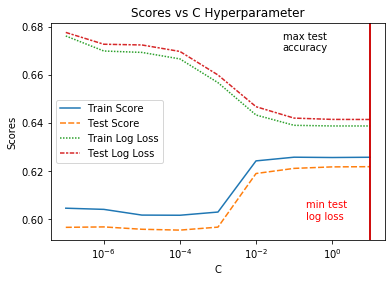

In [18]:
import seaborn as sns
ax = sns.lineplot(data=score_data)
ax.set(xscale='log')
plt.axvline(score_data['Test Score'].idxmax(), color='k')
plt.axvline(score_data['Test Log Loss'].idxmin(), color='r')
plt.xlabel('C')
plt.ylabel('Scores')
plt.text(0.05, 0.67, 'max test\naccuracy')
plt.text(0.2, 0.6, 'min test\nlog loss', color='r')
plt.title('Scores vs C Hyperparameter')
plt.show()

In [19]:
# We are going to use 10 for the C value
# Final run of model with desired parameters
c=10
logit = LogisticRegression(C=c, penalty='l2', solver='liblinear')

logit.fit(X_train, y_train)
train_probs = logit.predict_proba(X_train)
test_probs = logit.predict_proba(X_test)

print('Training score', logit.score(X_train, y_train))
print('Testing score', logit.score(X_test, y_test))
print('Log_loss training', log_loss(y_train, train_probs))
print('log_loss testing', log_loss(y_test, test_probs))

Training score 0.6256658380681818
Testing score 0.6217487794052374
Log_loss training 0.6386633572015239
log_loss testing 0.641362532959681


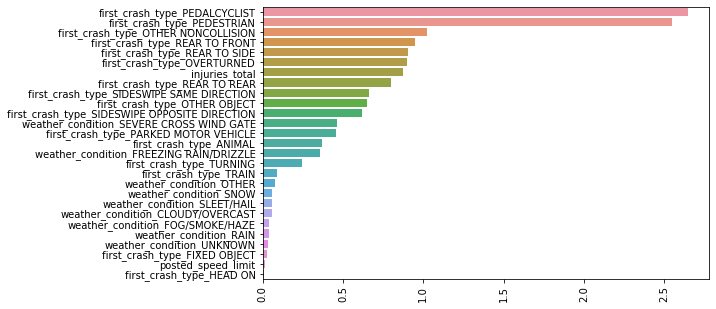

In [20]:
coefs = pd.Series(logit.coef_[0], index=X_train.columns)

plt.figure(figsize=(8,5))
sns.barplot(x=np.abs(coefs).sort_values(ascending=False), y=np.abs(coefs).sort_values(ascending=False).index)
plt.xticks(rotation=90)
plt.show()

In [ ]:
# Do the same thing but with statsmodels


The first_crash_type variable appears to have the most effect on our outcome label. Specifically, whether or not the first_crash_type was equal to a pedestrian or pedacyclist really made a difference in how expensive the crash was.

In [21]:
# Determine how much of an effect the first two variables had:

sorted_coefs = np.abs(coefs).sort_values(ascending=False)
print('Highest 5 coefs')
coefs.loc[sorted_coefs.head().index]
print('The first three crash types tended to negatively affect the label, while the OVERTURNED VARIABLE positively affected it. Apparently its not as expensive to hit people compared to flipping your car')
print('Negative coefficients meant that when that category is true, you are likely to not have over $1500 accident')

Highest 5 coefs
The first three crash types tended to negatively affect the label, while the OVERTURNED VARIABLE positively affected it. Apparently its not as expensive to hit people compared to flipping your car
Negative coefficients meant that when that category is true, you are likely to not have over $1500 accident


As we did on the previous exercise, make predictions on the test set and join them to the corresponding true outcomes, then use the *calibration_curve* function in scikit learn to plot a calibration curve. Is the model well-calibrated?

In [22]:
# answer goes here

y_pred = logit.predict(X_test)

pred_and_true = pd.DataFrame(y_test).assign(predicted=y_pred)

pred_and_true.head()

,damage,predicted
22097,0,1
137413,1,1
71395,0,1
62516,1,1
258678,1,0


Logistic:
	Brier: 0.226
	Precision: 0.615
	Recall: 0.967
	F1: 0.752

Logistic Regression:
	Brier: 0.226
	Precision: 0.619
	Recall: 0.955
	F1: 0.751

Logistic Regression + Isotonic:
	Brier: 0.226
	Precision: 0.615
	Recall: 0.969
	F1: 0.753

Logistic Regression + Sigmoid:
	Brier: 0.226
	Precision: 0.618
	Recall: 0.957
	F1: 0.751



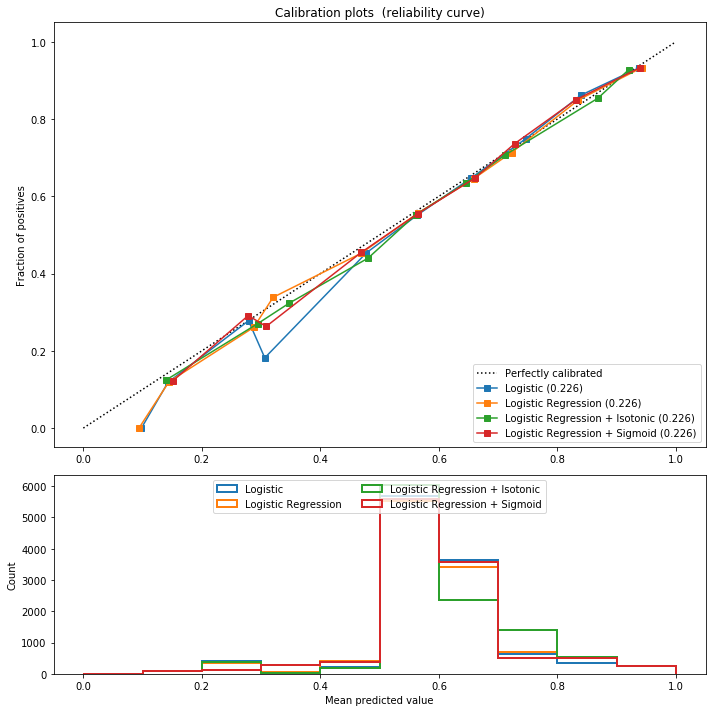

In [23]:
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import LinearSVC
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import (brier_score_loss, precision_score, recall_score,
                             f1_score)
from sklearn.calibration import CalibratedClassifierCV, calibration_curve
from sklearn.model_selection import train_test_split

def plot_calibration_curve(est, name, fig_index):
    """Plot calibration curve for est w/o and with calibration. """
    # Calibrated with isotonic calibration
    isotonic = CalibratedClassifierCV(est, cv=2, method='isotonic')

    # Calibrated with sigmoid calibration
    sigmoid = CalibratedClassifierCV(est, cv=2, method='sigmoid')

    # Logistic regression with no calibration as baseline
    lr = LogisticRegression(C=1.)

    fig = plt.figure(fig_index, figsize=(10, 10))
    ax1 = plt.subplot2grid((3, 1), (0, 0), rowspan=2)
    ax2 = plt.subplot2grid((3, 1), (2, 0))

    ax1.plot([0, 1], [0, 1], "k:", label="Perfectly calibrated")
    for clf, name in [(lr, 'Logistic'),
                      (est, name),
                      (isotonic, name + ' + Isotonic'),
                      (sigmoid, name + ' + Sigmoid')]:
        clf.fit(X_train, y_train)
        y_pred = clf.predict(X_test)
        if hasattr(clf, "predict_proba"):
            prob_pos = clf.predict_proba(X_test)[:, 1]
        else:  # use decision function
            prob_pos = clf.decision_function(X_test)
            prob_pos = \
                (prob_pos - prob_pos.min()) / (prob_pos.max() - prob_pos.min())

        clf_score = brier_score_loss(y_test, prob_pos, pos_label=y.max())
        print("%s:" % name)
        print("\tBrier: %1.3f" % (clf_score))
        print("\tPrecision: %1.3f" % precision_score(y_test, y_pred))
        print("\tRecall: %1.3f" % recall_score(y_test, y_pred))
        print("\tF1: %1.3f\n" % f1_score(y_test, y_pred))

        fraction_of_positives, mean_predicted_value = \
            calibration_curve(y_test, prob_pos, n_bins=10)

        ax1.plot(mean_predicted_value, fraction_of_positives, "s-",
                 label="%s (%1.3f)" % (name, clf_score))

        ax2.hist(prob_pos, range=(0, 1), bins=10, label=name,
                 histtype="step", lw=2)

    ax1.set_ylabel("Fraction of positives")
    ax1.set_ylim([-0.05, 1.05])
    ax1.legend(loc="lower right")
    ax1.set_title('Calibration plots  (reliability curve)')

    ax2.set_xlabel("Mean predicted value")
    ax2.set_ylabel("Count")
    ax2.legend(loc="upper center", ncol=2)

    plt.tight_layout()

# Plot calibration curve for Gaussian Naive Bayes
plot_calibration_curve(LogisticRegression(C=c, penalty='l2', solver='liblinear'), "Logistic Regression", 1)

plt.show()

Accprding to this graph, the model seems fairly well calibrated. The higher the x-axis, the more fit the model gets.